# 2013년 2023년 멜론 차트 데이터 분석 및 시각화
*6조*

##1.라이브러리

### 라이브러리 다운로드

In [ ]:
!pip install koreanize-matplotlib

### 라이브러리 호출

In [ ]:
import pandas as pd

from google.colab import files
from collections import Counter
import re

import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import koreanize_matplotlib

##2.데이터 전처리 과정

### 데이터 불러오기 및 병합

In [ ]:
# 가사에 단어 추출

# 1) 데이터 프레임 불러오기
df_2013 = pd.read_csv('/content/멜론_2013년_TOP30_2024-07-10.csv')
df_2013['년도'] = 2013

df_2023 = pd.read_csv('/content/멜론_2023년_TOP30_2024-07-10.csv')
df_2023['년도'] = 2023
df_2023['가수'].value_counts()

# 데이터 프레임 병합
df = pd.concat([df_2013, df_2023], ignore_index=True)
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/멜론_2023년_Top30_2024-07-10.csv'

### 년도에 따른 장르별 노래개수 그룹화 과정

In [ ]:
genre_df_2013 = df.query('년도 == 2013').groupby('장르', as_index=False).agg(n=('장르', 'count')).sort_values('n', ascending=False)
genre_df_2023 = df.query('년도 == 2023').groupby('장르', as_index=False).agg(n=('장르', 'count')).sort_values('n', ascending=False)

### 가수 차트인 횟수 그룹화 과정

In [ ]:
df.query('년도 == 2013')['가수'].value_counts()

In [ ]:
df.query('년도 == 2023')['가수'].value_counts()

In [ ]:
singer_df = df.groupby('가수', as_index=False).agg(n=('가수', 'count')).sort_values('n', ascending=False)
singer_df.info()
# 2013년과 2023년 차트에 들어간 아티스트 수 : 45명

### 워드클라우드 시각화를 위한 가수명 병합

In [ ]:
singers = ' '.join(df['가수'])
type(singers)

##3.데이터 시각화

### 장르별 노래개수 시각화

In [ ]:
px.histogram(genre_df_2013, x='장르', y='n', text_auto=True, title='2013년 장르별 노래개수')

In [ ]:
px.histogram(genre_df_2023, x='장르', y='n', text_auto=True, title='2023년 장르별 노래 개수')

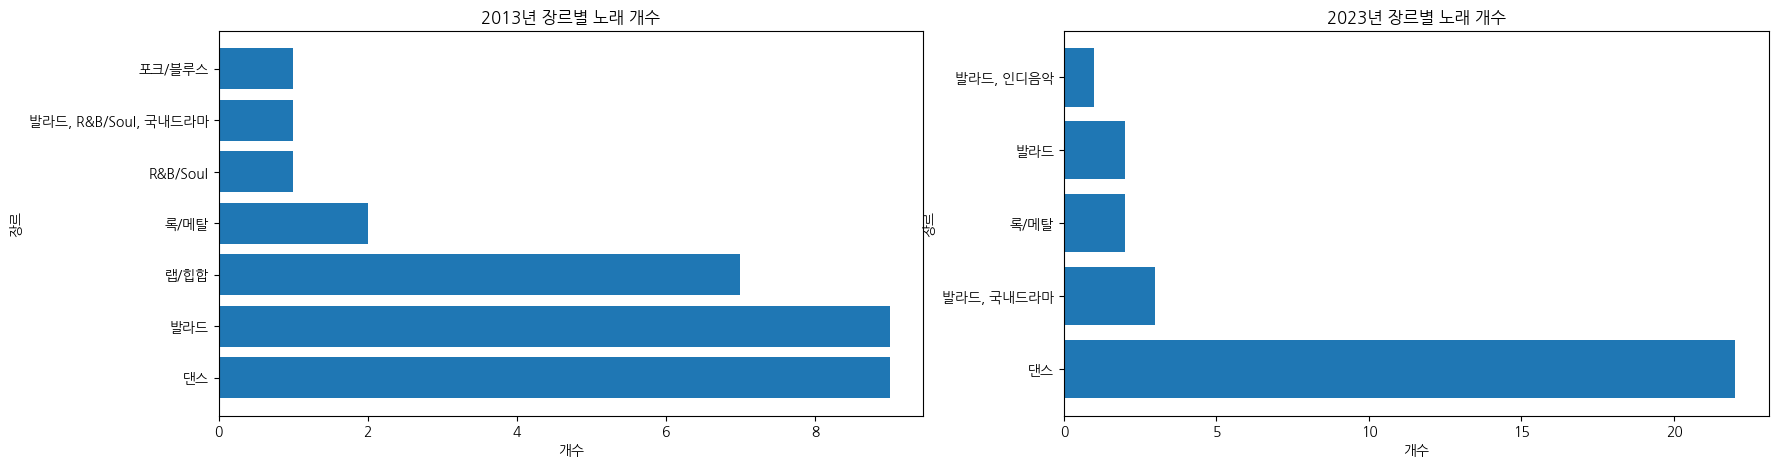

In [ ]:
# Matplotlib 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# 2013년 그래프
axes[0].barh(genre_df_2013['장르'], genre_df_2013['n'])
axes[0].set_title('2013년 장르별 노래 개수')
axes[0].set_xlabel('개수')
axes[0].set_ylabel('장르')

# 2023년 그래프
axes[1].barh(genre_df_2023['장르'], genre_df_2023['n'])
axes[1].set_title('2023년 장르별 노래 개수')
axes[1].set_xlabel('개수')
axes[1].set_ylabel('장르')

plt.show()

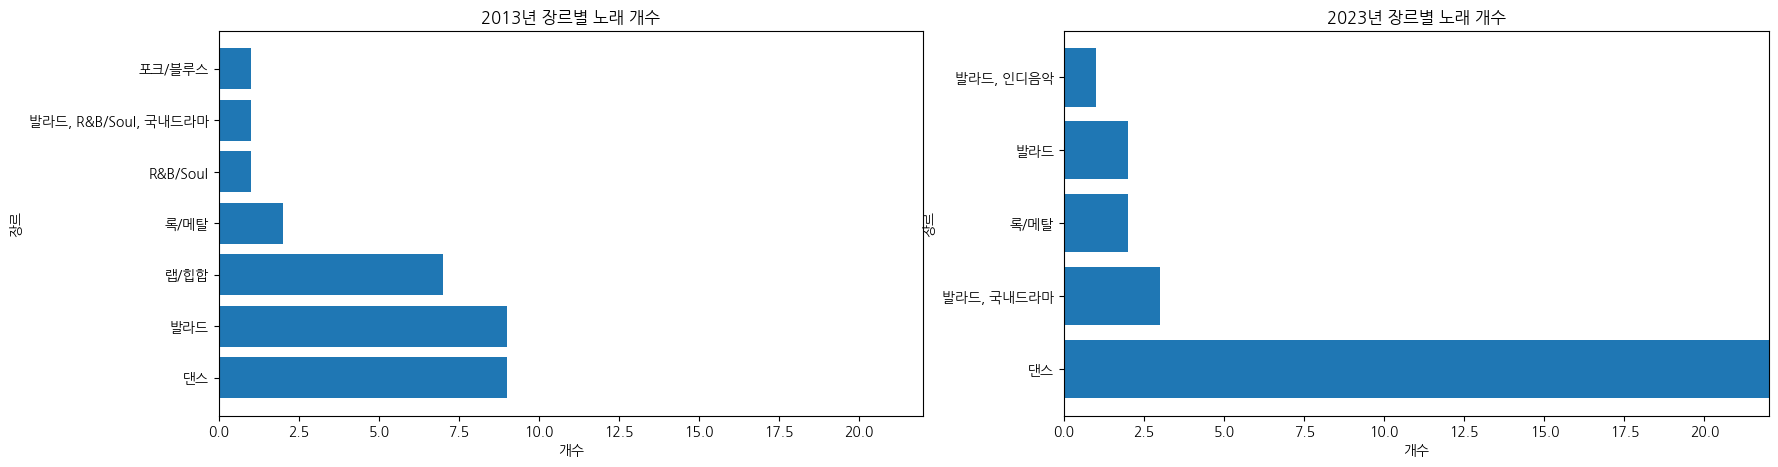

In [ ]:
# Matplotlib 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# 2013년 그래프
axes[0].barh(genre_df_2013['장르'], genre_df_2013['n'])
axes[0].set_title('2013년 장르별 노래 개수')
axes[0].set_xlabel('개수')
axes[0].set_ylabel('장르')

# 2023년 그래프
axes[1].barh(genre_df_2023['장르'], genre_df_2023['n'])
axes[1].set_title('2023년 장르별 노래 개수')
axes[1].set_xlabel('개수')
axes[1].set_ylabel('장르')


max_count = max(genre_df_2013['n'].max(), genre_df_2023['n'].max())
axes[0].set_xlim(0, max_count)
axes[1].set_xlim(0, max_count)
plt.show()

### 2013년 2023년 차트인 횟수 시각화

In [ ]:
px.histogram(singer_df.head(10), x='n', y='가수', text_auto=True, orientation='h', title='2013년 2023년 차트인 횟수')

### 2013년 20203년 차트인 가수 워드클라우드 시각화

In [ ]:
singers_2013 = ' '.join(df_2013['가수'])
singers_2023 = ' '.join(df_2023['가수'])

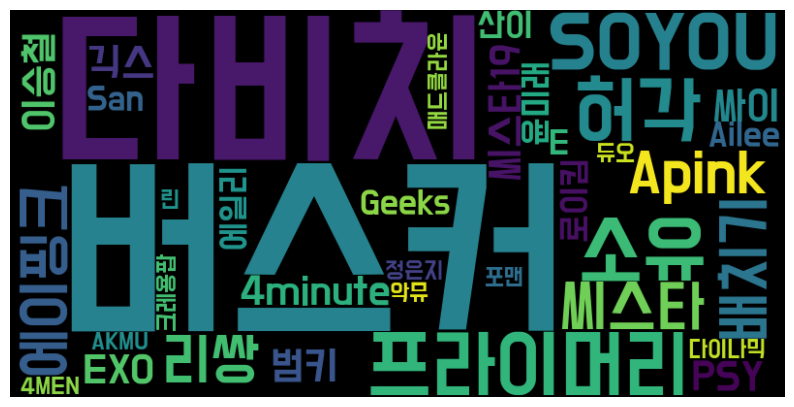

In [ ]:
font_path = '/content/BMDOHYEON_ttf.ttf'


# 워드 클라우드 시각화
wc_1 = WordCloud(width=800, height=400, font_path=font_path).generate(singers_2013)
plt.figure(figsize=(10,6))
plt.imshow(wc_1,interpolation='bilinear')
plt.axis('off')
plt.show()

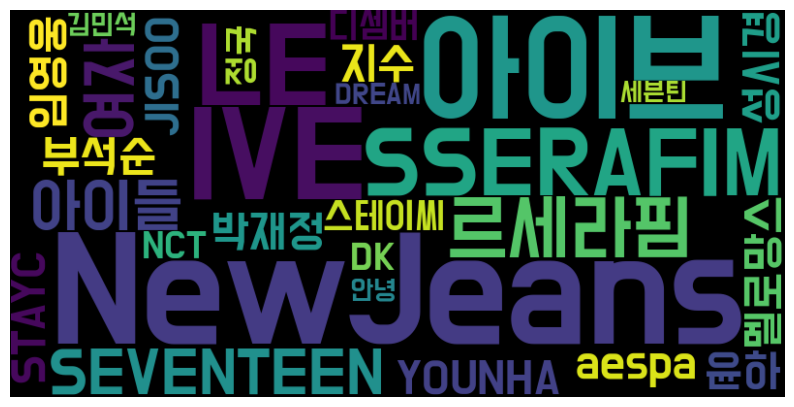

In [ ]:
font_path = '/content/BMDOHYEON_ttf.ttf'


# 워드 클라우드 시각화
wc_2 = WordCloud(width=800, height=400, font_path=font_path).generate(singers_2023)
plt.figure(figsize=(10,6))
plt.imshow(wc_2,interpolation='bilinear')
plt.axis('off')
plt.show()

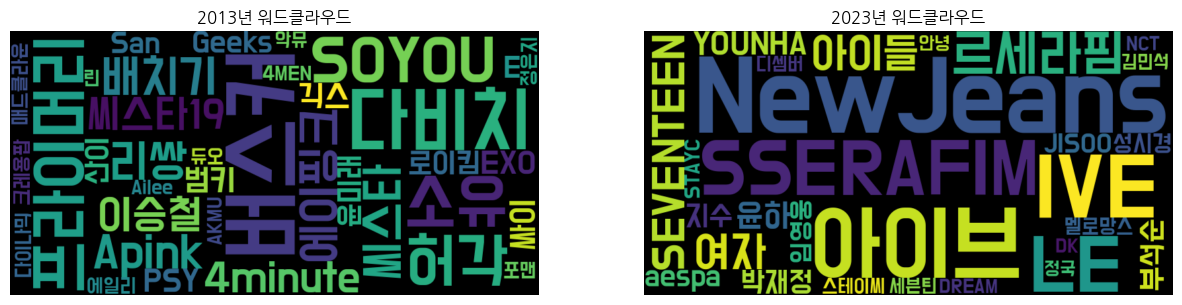

In [ ]:
font_path = '/content/BMDOHYEON_ttf.ttf'


# 워드 클라우드 시각화
wc_1 = WordCloud(width=800, height=400, font_path=font_path).generate(singers_2013)
wc_2 = WordCloud(width=800, height=400, font_path=font_path).generate(singers_2023)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(wc_1, interpolation='bilinear')
axes[0].set_title('2013년 워드클라우드')
axes[0].axis('off')

axes[1].imshow(wc_2, interpolation='bilinear')
axes[1].set_title('2023년 워드클라우드')
axes[1].axis('off')

plt.show()